In [182]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

In [183]:
from sklearn.cluster import KMeans

In [184]:
# загружаем данные
df = pd.read_csv('data/pokemon.csv')
# датасет содержит название покемона, уровень его защиты, силу атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



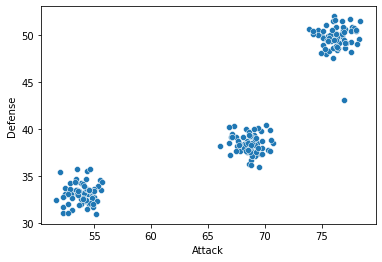

In [185]:
# попробуем кластеризовать покемонов по их силе атаки и уровню защиты
# для этого сохраним в матрицу X два интересующих нас признака: атаку и защиту
X = df[['Attack', 'Defense']]

#визуализируем
sns.scatterplot(df.Attack, df.Defense);

In [186]:
df.Attack

0      77.634658
1      67.454273
2      76.007423
3      77.828031
4      68.658104
         ...    
201    75.932190
202    76.919520
203    76.038055
204    66.854449
205    54.522347
Name: Attack, Length: 206, dtype: float64

In [187]:
df['Attack']

0      77.634658
1      67.454273
2      76.007423
3      77.828031
4      68.658104
         ...    
201    75.932190
202    76.919520
203    76.038055
204    66.854449
205    54.522347
Name: Attack, Length: 206, dtype: float64

c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



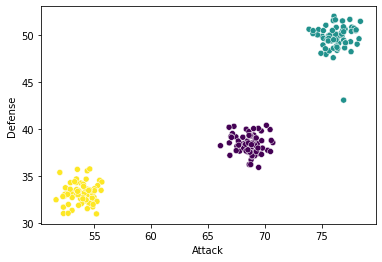

In [188]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#визуализируем результаты. Параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(df.Attack, df.Defense, c=predictions);

c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



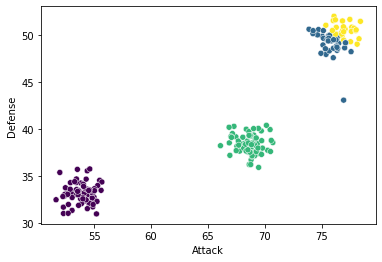

In [189]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k4'] = predictions

#визуализируем результаты. Параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(df.Attack, df.Defense, c=predictions);

In [190]:
# добавляем третий признак — скорость покемона, алгоритм такой же
X = df[['Attack', 'Defense', 'Speed']]
 
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
 
# запускаем обучение модели
kmeans.fit(X)
 
# предсказываем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

In [191]:
predictions

array([0, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0,
       2, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 1,
       1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       0, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 0, 1, 1, 0, 2, 2,
       0, 2, 1, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 2, 0, 2, 2])

In [192]:
df['Clusters_k3_'] = predictions
df

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters,Clusters_k3,Clusters_k4,Clusters_k3_
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2,1,3,0
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1,0,2,2
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2,1,1,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2,1,3,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
201,Skiddo,350,66,75.932190,50.498392,62,57,52,2,1,3,2
202,Gogoat,531,123,76.919520,50.361511,97,81,68,2,1,3,2
203,Clauncher,330,50,76.038055,49.515184,58,63,44,2,1,1,0
204,Clawitzer,500,71,66.854449,40.217467,120,89,59,1,0,2,2


In [193]:
df['Clusters_k3_'].value_counts()

2    91
0    59
1    56
Name: Clusters_k3_, dtype: int64

In [194]:
df['Diff_1'] = df['RealClusters'] - df['Clusters_k3']
df['Diff_1'] = df['Diff_1'].apply(lambda x: 1 if x == 0 else 0)

df['Diff_2'] = df['RealClusters'] - df['Clusters_k3_']
df['Diff_2'] = df['Diff_2'].apply(lambda x: 1 if x == 0 else 0)

In [195]:
df['Diff_1'].value_counts()

0    206
Name: Diff_1, dtype: int64

In [196]:
df['Diff_2'].value_counts()

0    126
1     80
Name: Diff_2, dtype: int64

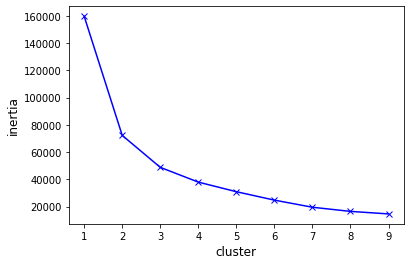

In [197]:
# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

In [198]:
X = df[['Attack', 'Defense']]

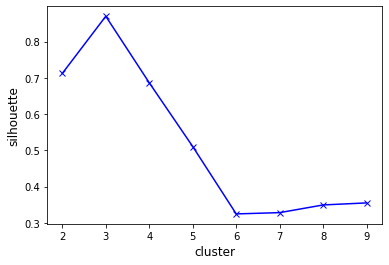

In [199]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчёте метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, X))

# визуализируем коэффициенты силуэта для разного количества кластеров
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouette, 'xb-')

In [200]:
data = pd.read_csv('data/values_from_the_instrument.csv')
data.head()

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278


In [201]:
km = KMeans(
    n_clusters=2, 
    init='k-means++', 
    n_init=10, 
    random_state=42)

X = data

km.fit(X)

lbls = km.labels_

lbls

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,

c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot: xlabel='x1', ylabel='x2'>

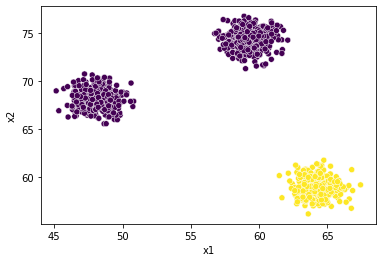

In [202]:
sns.scatterplot(data.x1, data.x2, c=lbls)

c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot: xlabel='x1', ylabel='x2'>

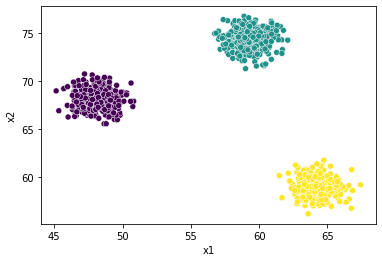

In [203]:
km = KMeans(
    n_clusters=3, 
    init='k-means++', 
    n_init=10, 
    random_state=42)

X = data

km.fit(X)

lbls = km.labels_

sns.scatterplot(data.x1, data.x2, c=lbls)

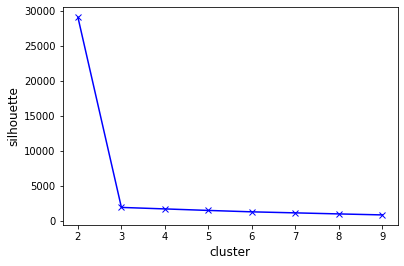

In [204]:
slt = []
for cl_num in range(2, 10):
    slt.append(get_inertia(cl_num, X))
    
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], slt, 'xb-')

In [205]:
# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))

1.0


In [206]:
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[1, 1, 0, 0]))

1.0


In [207]:
# передадим информацию о том, какие на самом деле должны быть кластеры и результаты предсказания
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
1.0


In [208]:
# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы, подсчитываем метрику
completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1])

1.0

In [209]:
completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[1, 1, 0, 0])

1.0

In [210]:
# посчитаем, насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

# посчитаем, насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.829867483307009


In [211]:
# импортируем из библиотеки sklearn подсчёт V-меры
from sklearn.metrics import v_measure_score

# посчитаем V-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.9070246789753754


In [212]:
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3_))

0.01125977565655585


In [213]:
print(v_measure_score(df.RealClusters, df.Clusters_k3_))

0.01125977565655585


In [214]:
# импортируем из библиотеки sklearn подсчёт индекса Рэнда
from sklearn.metrics.cluster import rand_score
# передаём в rand_score размеченные и предсказанные данные
rand_score([0, 0, 1, 1], [0, 0, 1, 1])

1.0

In [215]:
rand_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

In [216]:
print(rand_score(df.RealClusters, df.Clusters_k3))

1.0


In [217]:
print(rand_score(df.RealClusters, df.Clusters_k4))

0.94643618280843


In [218]:
print(rand_score(df.RealClusters, df.Clusters_k3_))

0.5521667061330807


In [219]:
round(homogeneity_score([1, 2, 2, 1, 0], [1, 0, 2, 1, 2]), 2)

0.74

In [220]:
df = pd.read_csv('data/pokemon.csv')
X = df[['Attack', 'Defense']]

In [221]:
from sklearn.cluster import AgglomerativeClustering

agglomerative_clustering = AgglomerativeClustering(n_clusters=2)
agglomerative_clustering.fit(X)
agglomerative_clustering.labels_

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [222]:
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)
gm_prediction

array([1, 0, 1, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 0, 0, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1,
       1, 0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 0, 1, 0, 2, 2, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 0, 0, 1, 0, 0, 1,
       1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0,
       0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 1,
       0, 2, 1, 1, 1, 1, 0, 2], dtype=int64)

In [223]:
house = pd.read_csv('data/housing.csv')
house.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



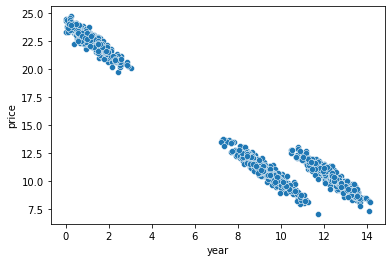

In [224]:
sns.scatterplot(house.year, house.price);

In [225]:
X = house

gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

pred = pd.Series(gmm.predict(X))
pred.value_counts()

2    467
0    467
1    421
dtype: int64

c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



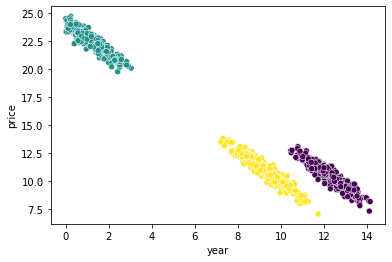

In [226]:
sns.scatterplot(house.year, house.price, c=pred);

In [227]:
km = KMeans(n_clusters=3, random_state=42)

km.fit(X)

pred_km = km.predict(X)

c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



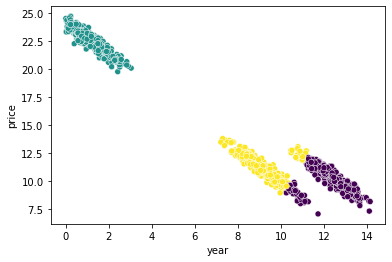

In [228]:
sns.scatterplot(house.year, house.price, c=pred_km);

In [229]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



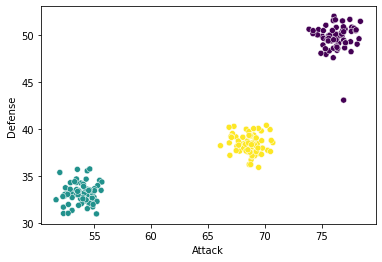

In [230]:
sns.scatterplot(df.Attack, df.Defense, c=spectral_predictions);

c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



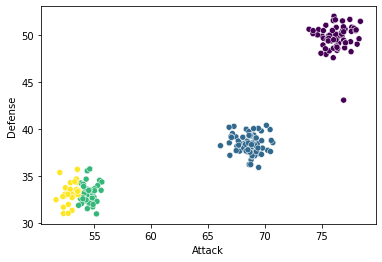

In [231]:
# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=4, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

sns.scatterplot(df.Attack, df.Defense, c=spectral_predictions);

c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot: xlabel='Attack', ylabel='Defense'>

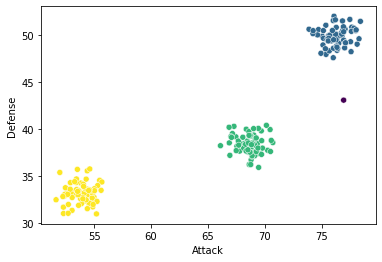

In [232]:
# импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(df.Attack, df.Defense, c=clustering.labels_)

c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot: xlabel='Attack', ylabel='Defense'>

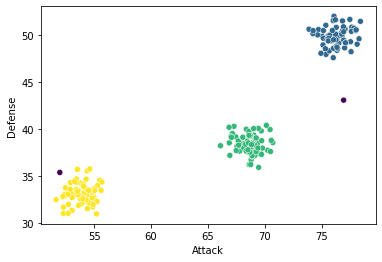

In [233]:
# импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=1, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(df.Attack, df.Defense, c=clustering.labels_)

c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot: xlabel='Attack', ylabel='Defense'>

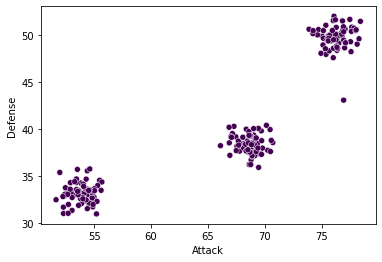

In [234]:
# импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=20, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(df.Attack, df.Defense, c=clustering.labels_)

c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot: xlabel='year', ylabel='price'>

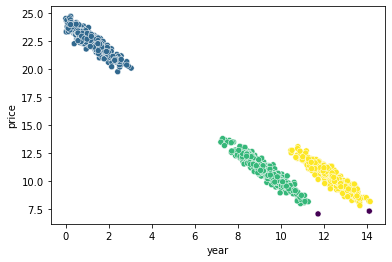

In [235]:
dbs = DBSCAN()
dbs.fit(X)

sns.scatterplot(X.year, X.price, c=dbs.labels_)

c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot: xlabel='year', ylabel='price'>

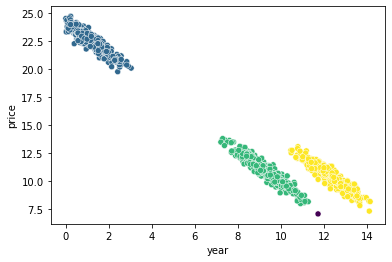

In [236]:
dbs = DBSCAN(eps=0.7, min_samples=5)
dbs.fit(X)

sns.scatterplot(X.year, X.price, c=dbs.labels_)

In [237]:
df = pd.read_csv("data/airbnb.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot: xlabel='latitude', ylabel='longitude'>

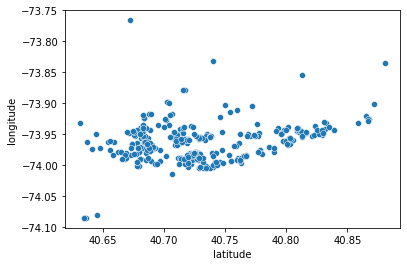

In [238]:
sns.scatterplot(df.latitude, df.longitude)

In [239]:
# инициализируем k-means-кластеризацию с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6)

# обучим k-means-модель кластеризации на данных о широте и долготе, сохраним данные о кластерах в predictions
predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude']])

# сохраним предсказания в колонку clusters датафрейма
df["clusters"] = predictions


# с помощью метода cluster_centers_ найдём координаты центроидов кластеров, сохраним их в список centroids
centroids = kmeans_clustering.cluster_centers_

# для шести кластеров сохраним в отдельные списки значения координат x и y
centroids_x = [i[0] for i in centroids]
centroids_y = [i[1] for i in centroids]

# зададим цвета для разных кластеров
colors = ['#DF2020', '#81DF20', '#2095DF', '#DF20C8', '#20DFC5', '#DF8520']

# создадим пустые словари, чтобы потом соотнести координаты x и у центроидов разных кластеров, а также цвета 
centroids_x_dict = {}
centroids_y_dict = {}
colors_dict = {}

# итерируемся шесть раз, так как у нас шесть кластеров
for i in range(6):
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты x центроида — в качестве значения
    centroids_x_dict[i] = centroids_x[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты y центроида — в качестве значения
    centroids_y_dict[i] = centroids_y[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение цвета — в качестве значения
    colors_dict[i] = colors[i]

In [240]:
df['cen_x'] = df.clusters.map(centroids_x_dict) 
df['cen_y'] = df.clusters.map(centroids_y_dict)
df['color'] = df.clusters.map(colors_dict)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clusters,cen_x,cen_y,color
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,3,40.677937,-73.967837,#DF20C8
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1,40.735543,-73.988864,#81DF20
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,2,40.812241,-73.943805,#2095DF
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,3,40.677937,-73.967837,#DF20C8
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2,40.812241,-73.943805,#2095DF


In [241]:
df.clusters

0      3
1      1
2      2
3      3
4      2
      ..
345    3
346    3
347    3
348    5
349    3
Name: clusters, Length: 350, dtype: int32

c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot: xlabel='latitude', ylabel='longitude'>

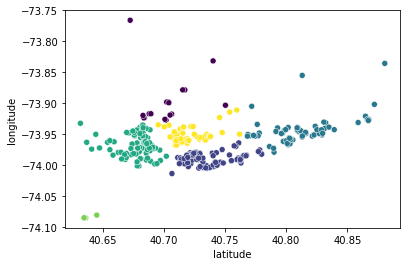

In [242]:
sns.scatterplot(df.latitude, df.longitude, c=df.clusters)

c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot: xlabel='latitude', ylabel='longitude'>

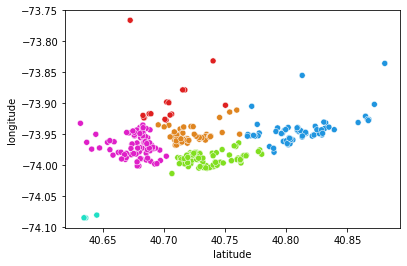

In [243]:
sns.scatterplot(df.latitude, df.longitude, c=df.color)

c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot: xlabel='latitude', ylabel='longitude'>

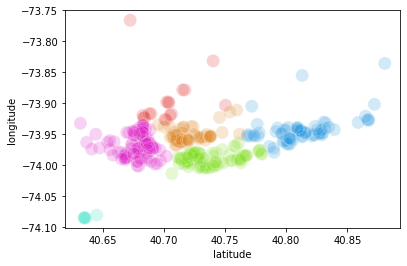

In [244]:
sns.scatterplot(df.latitude, df.longitude, c=df.color, alpha=0.2, s=170)

c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot: xlabel='latitude', ylabel='longitude'>

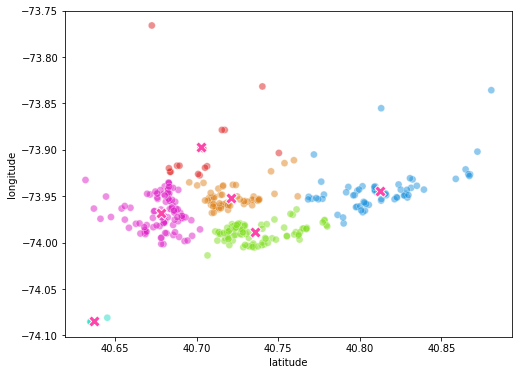

In [245]:
fig, axes = plt.subplots(figsize=(8, 6))
# визуализируем элементы датасета
# параметр c отвечает за цвет элемента в зависимости от того, к какому кластеру он принадлежит
# s отвечает за размер объектов на графике, alpha отвечает за прозрачность точек
sns.scatterplot(df.latitude, df.longitude, c=df.color, s=50, alpha=0.5)
# визуализируем центроиды: отметим их на графике крестиком (marker="X") и зададим им розовый цвет 
sns.scatterplot(centroids_x, centroids_y, marker="X", c=['#FC46AA'], s=130)

In [246]:
from scipy.spatial import ConvexHull

points = np.array([[ 40.64524, -74.08088], [ 40.63536, -74.08537], [ 40.63627, -74.08543], [ 40.63518, -74.08546], [ 40.63481, -74.08519]])
hull = ConvexHull(points)
hull.vertices

array([0, 4, 3, 2], dtype=int32)

In [247]:
df[df.clusters == i][['latitude', 'longitude']].head()

,latitude,longitude
15,40.70837,-73.95352
20,40.71842,-73.95718
32,40.72219,-73.93762
46,40.74771,-73.94740
52,40.70420,-73.93560


In [248]:
df[df.clusters == i][['latitude', 'longitude']].values[:5]

array([[ 40.70837, -73.95352],
       [ 40.71842, -73.95718],
       [ 40.72219, -73.93762],
       [ 40.74771, -73.9474 ],
       [ 40.7042 , -73.9356 ]])

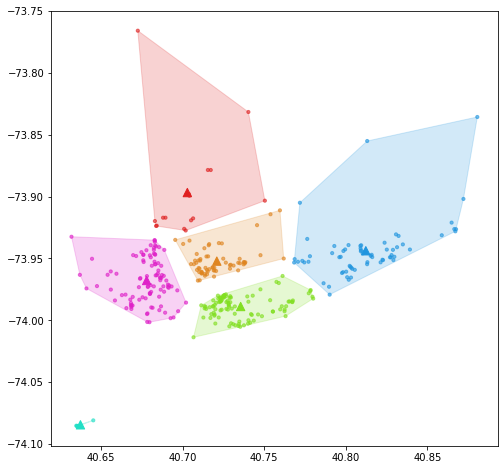

In [249]:
fig, ax = plt.subplots(1, figsize=(8,8))

# визуализируем объекты кластеров и центроиды
plt.scatter(df.latitude, df.longitude, c=df.color, alpha = 0.6, s=10)
plt.scatter(centroids_x, centroids_y, marker='^', c=colors, s=70)

# найдём уникальные значения кластеров и проитерируемся по каждому кластеру
for i in df.clusters.unique():
    # запишем в points значения признаков широты и долготы, принадлежащие к i-му кластеру
    points = df[df.clusters == i][['latitude', 'longitude']].values
 
    hull = ConvexHull(points)
    
    # Запишем координаты оболочки по оси x. Из hull.vertices узнаем индексы элементов, входящих в оболочку.
    # Так как оболочка должна быть замкнутой, то в конце добавляем ещё раз нулевой элемент.
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0]) 
    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0]) 
    
    # рисуем оболочку и заливаем её таким же цветом, как и объекты кластера
    plt.fill(x_hull, y_hull, alpha=0.2, c=colors[i])

In [250]:
# запускаем агломеративную кластеризацию, расстояние между кластерами рассчитываем методом одиночной связи
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='single')

# обучаем модель и получаем результаты кластеризации
predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])

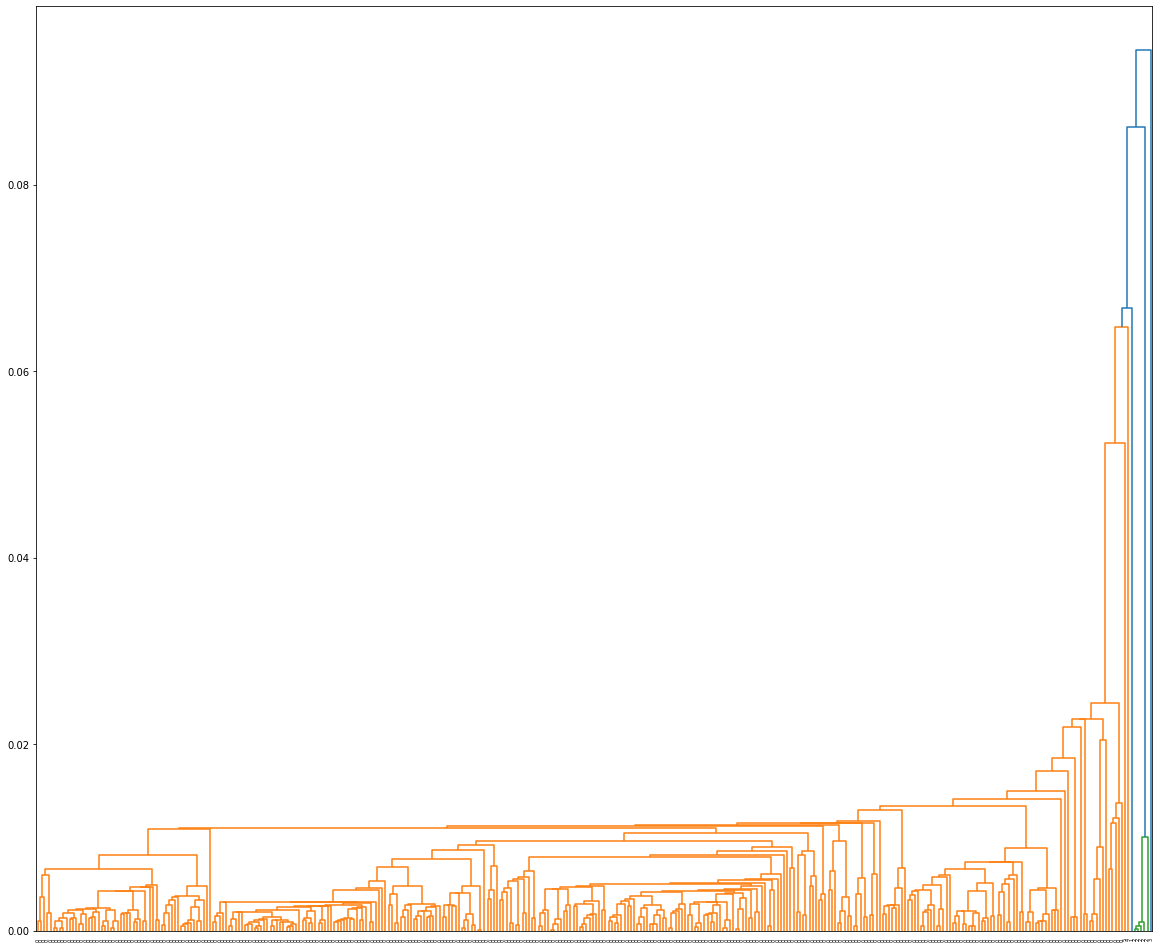

In [251]:
from scipy.cluster.hierarchy import dendrogram, linkage

# рассчитаем расстояния между кластерами
linked = linkage(df[["latitude", "longitude"]], 'single')

plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model,
            distance_sort='descending')

plt.show()

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.04532027244567871 seconds.
K=3 fitted in 0.03175997734069824 seconds.
K=4 fitted in 0.0539853572845459 seconds.
K=5 fitted in 0.06905078887939453 seconds.
K=6 fitted in 0.08573293685913086 seconds.
K=7 fitted in 0.0728912353515625 seconds.
K=8 fitted in 0.07157015800476074 seconds.


<AxesSubplot: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

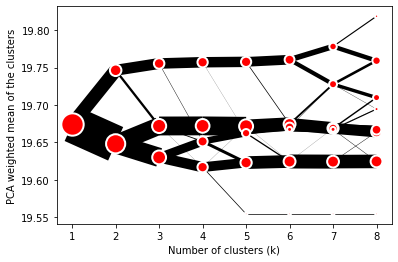

In [252]:
# импортируем библиотеку clustergram
from clustergram import Clustergram

# задаём количество кластеров, для которых хотим получить визуализацию, определяем метод кластеризации
cgram = Clustergram(range(1, 9), method='kmeans')

# запускаем алгоритм
cgram.fit(df[["latitude", "longitude"]])
cgram.plot()

In [253]:
# инициализируем k-means-кластеризацию с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6)

# обучим k-means-модель кластеризации на данных широты, долготы и цены, сохраним данные о кластерах для этих данных в kmeans_predictions
kmeans_predictions = kmeans_clustering.fit_predict(df[['latitude', 'longitude', 'price']])

# сохраним предсказания в колонку clusters датафрейма
df["clusters_3d"] = kmeans_predictions

Text(0.5, 0, 'price')

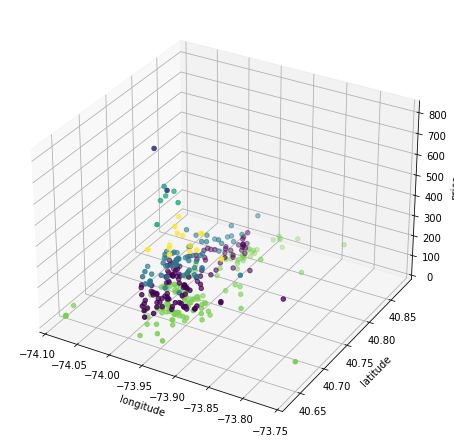

In [254]:
from mpl_toolkits.mplot3d import Axes3D

# создадим трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавим дополнительную ось в объект картинки
fig.add_axes(ax)

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(df.longitude.to_list(), df.latitude.to_list(), df.price.to_list(), c=df.clusters_3d)
# добавим оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

Text(0.5, 0, 'price')

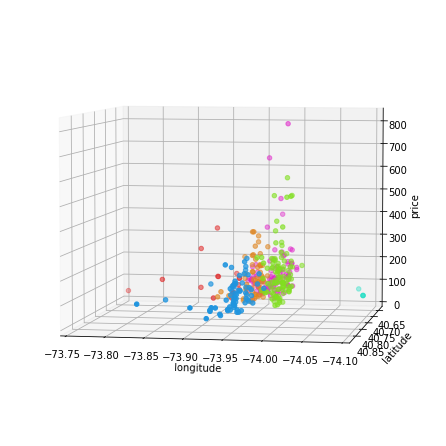

In [255]:
from mpl_toolkits.mplot3d import Axes3D

# создаём трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавляем дополнительную ось в объект картинки
fig.add_axes(ax)

ax.azim = 100
ax.elev = 5

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(df.longitude.to_list(), df.latitude.to_list(), df.price.to_list(), c=df.color)
# добавляем оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

In [256]:
import plotly
import plotly.express as px

# передаём датафрейм и поля, которые нужно использовать для осей абсцисс, ординат и аппликат
# в значение color передаём номера кластеров
fig = px.scatter_3d(
    data_frame=df, 
    x = 'longitude', 
    y = 'latitude', 
    z = 'price', 
    color='clusters', 
    width=1000,
    height=700
)

#отображаем график
fig.show()

Практика

In [257]:
agg = AgglomerativeClustering(n_clusters=6, linkage='complete')

# обучаем модель и получаем результаты кластеризации
pred_agg = agg.fit_predict(df[['latitude', 'longitude']])

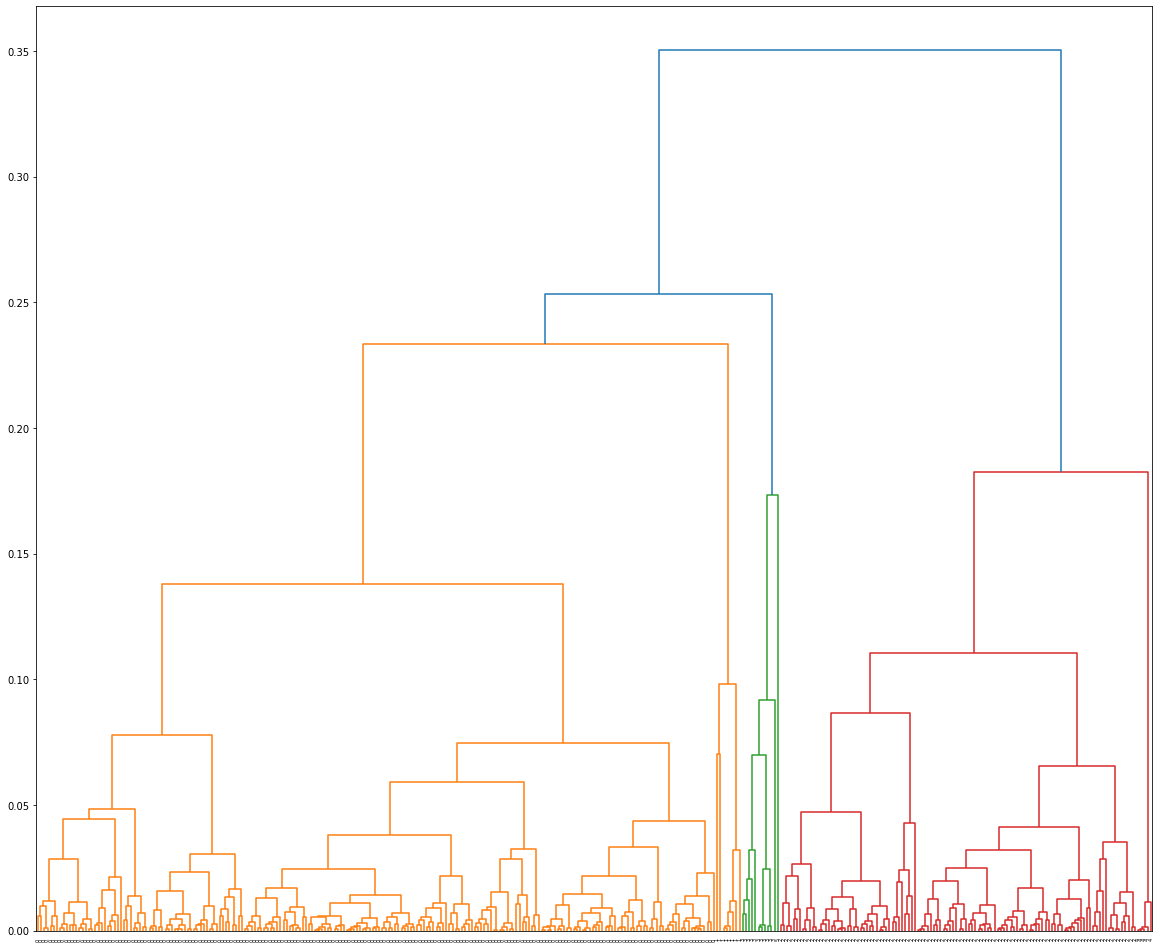

In [258]:
# рассчитаем расстояния между кластерами
linked = linkage(df[["latitude", "longitude"]], 'complete')

plt.figure(figsize=(20, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
            orientation='top',
            labels=pred_agg,
            distance_sort='descending')

plt.show()

c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot: xlabel='latitude', ylabel='longitude'>

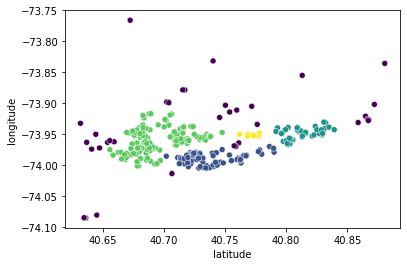

In [259]:
cl = DBSCAN(eps=0.012, min_samples=6).fit(df[['latitude', 'longitude']])

sns.scatterplot(df.latitude, df.longitude, c=cl.labels_)

In [260]:
df['clusters__'] = cl.labels_

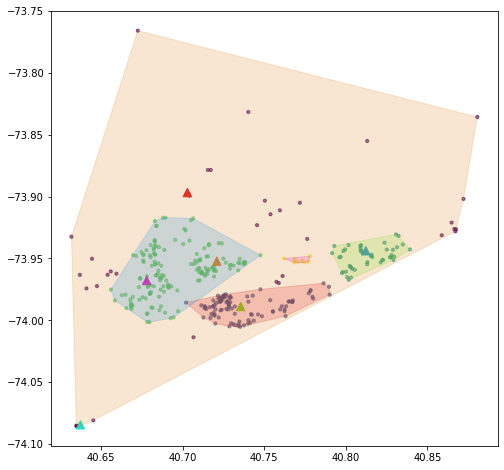

In [261]:
fig, ax = plt.subplots(1, figsize=(8,8))

# визуализируем объекты кластеров и центроиды
plt.scatter(df.latitude, df.longitude, c=cl.labels_, alpha = 0.6, s=10)
plt.scatter(centroids_x, centroids_y, marker='^', c=colors, s=70)

# найдём уникальные значения кластеров и проитерируемся по каждому кластеру
for i in df.clusters__.unique():
    # запишем в points значения признаков широты и долготы, принадлежащие к i-му кластеру
    points = df[df.clusters__ == i][['latitude', 'longitude']].values
 
    hull = ConvexHull(points)
    
    # Запишем координаты оболочки по оси x. Из hull.vertices узнаем индексы элементов, входящих в оболочку.
    # Так как оболочка должна быть замкнутой, то в конце добавляем ещё раз нулевой элемент.
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0]) 
    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0]) 
    
    # рисуем оболочку и заливаем её таким же цветом, как и объекты кластера
    plt.fill(x_hull, y_hull, alpha=0.2, c=colors[i])

In [262]:
# загрузим датасет MNIST
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

dataset = fetch_openml("mnist_784")

In [263]:
# загрузим признаки в переменную X  
X = dataset['data']
# загрузим «ответы» в переменную y
y = dataset['target']

In [264]:
# загрузим датасет MNIST
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

dataset = fetch_openml("mnist_784")
# загрузим признаки в переменную X  
X = dataset['data']
# загрузим «ответы» в переменную y
y = dataset['target']
# разделим данные с помощью sklearn на данные для обучения и теста
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=0)

# импортируем StandardScaler для стандартизации данных
from sklearn.preprocessing import StandardScaler

# создадим объект класса StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
# трансформируем датасеты train_x и test_x
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

# импортируем класс PCA
from sklearn.decomposition import PCA

# создадим объект класса PCA
pca = PCA(n_components=300)
pca.fit(train_x)
# уменьшим размерность данных
train_x_pca = pca.transform(train_x)
test_x_pca = pca.transform(test_x)

In [265]:
print(len(train_x[0]))
print(len(train_x_pca[0]))

784
300


In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# напишем функцию, которая на вход принимает X и y, а возвращает модель и время
def get_time_and_accuracy(train_x, train_y, test_x, test_y):
    # создадим объект класса LogisticRegression
    log_reg_model = LogisticRegression(max_iter=1000)
    from time import time
    # запишем время с начала эпохи в секундах до обучения модели
    start_time = time()
    # обучим модель
    log_reg_model.fit(train_x, train_y)    
    # запишем время с начала эпохи в секундах после обучения
    end_time = time()
    # подсчитаем время, потраченное на обучение модели
    time = end_time-start_time
    # предскажем на тестовых данных
    y_pred = log_reg_model.predict(test_x)
    # посчитаем скор для тестового предсказания
    score = accuracy_score(test_y, y_pred)
    # вернём время, потраченное на обучение, и качество полученной модели
    return time, score

In [267]:
model_pca_time, model_pca_acc = get_time_and_accuracy(train_x_pca, train_y, test_x_pca, test_y)
print(f"Модель, построенная на признаках, полученных после уменьшения размерности.\nВремя обучения: {model_pca_time}, метрика модели: {model_pca_acc}")

Модель, построенная на признаках, полученных после уменьшения размерности.
Время обучения: 84.47557234764099, метрика модели: 0.9248571428571428


In [268]:
model_time, model_acc = get_time_and_accuracy(train_x, train_y, test_x, test_y)
print(f"Модель, построенная на всех исходных признаках.\nВремя обучения: {model_time}, метрика модели: {model_acc}")

Модель, построенная на всех исходных признаках.
Время обучения: 198.3911898136139, метрика модели: 0.9187142857142857


In [269]:
# импортируем класс TSNE из модуля manifold библиотеки sklearn
from sklearn.manifold import TSNE

# создаём объект класса TSNE
# n_components — размерность нового пространства
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# обучаем модель на данных X, применяем уменьшение размерности к матрице X
tsne.fit_transform(X)

c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



array([[  8.208814  ,   0.60978097],
       [ 13.969618  ,   4.859159  ],
       [-17.376978  ,   6.6886    ],
       ...,
       [-17.62247   ,  -4.6568294 ],
       [  2.6963573 ,   4.4429364 ],
       [  9.612172  ,   9.499765  ]], dtype=float32)

<AxesSubplot: xlabel='0', ylabel='1'>

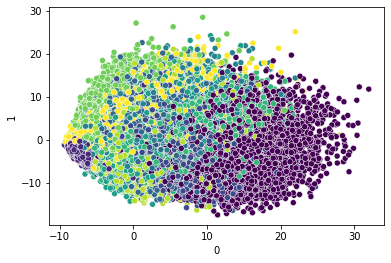

In [270]:
# создадим объект класса PCA, уменьшим размерность данных до 2
pca = PCA(n_components=2, random_state=42)

# уменьшим размерность данных
X_reduced = pca.fit_transform(train_x)
# сохраним данные в датафрейм
df_pca = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_pca['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
# визуализируем
sns.scatterplot(x=df_pca[0], y=df_pca[1], c=df_pca['c'])

c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\79265\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



<AxesSubplot: xlabel='0', ylabel='1'>

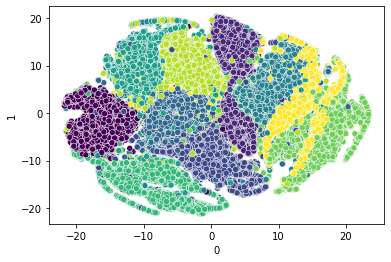

In [271]:
# создадим объект класса TSNE, уменьшим размерность данных до 2
tsne = TSNE(n_components=2, perplexity=50, n_iter=500, random_state=42)
# немного уменьшим количество объектов для уменьшения размерности, иначе алгоритм будет работать очень долго
X_reduced = tsne.fit_transform(train_x)
# сохраним данные в датафрейм
df_tsne = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_tsne['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], c=df_tsne['c'])